# Introduction
Life expectancy prognosing is a complex and multifaceted problem that involves analyzing a wide range of factors that can influence a person's lifespan. From a substantive point of view, there are several key considerations that must be taken into account when attempting to accurately predict life expectancy.

It is important to recognize that life expectancy is not a fixed value that is determined solely by genetics or other inherent factors. Rather, it is influenced by a wide range of environmental, social, and behavioral factors that can vary significantly across different populations and individuals. For example, access to healthcare, nutrition, and clean water can all have a significant impact on life expectancy, as can lifestyle factors such as smoking, alcohol consumption, and physical activity levels.


Life expectancy prognosing can have significant implications for both individuals and society as a whole. Accurate life expectancy forecasts can help individuals make important decisions about their healthcare, financial planning, and retirement, while also providing policymakers with valuable information about population health and healthcare needs.


Overall, the problem in question requires a deep understanding of a wide range of social, environmental, and behavioral factors. By taking a substantive approach to this problem and carefully considering all of the relevant factors, we can develop more accurate and useful life expectancy forecasts that can help individuals and society make better-informed decisions about health and well-being.

# Data Explanation:

TARGET: "Life Expectancy"



1. Country - List of the 179 countries
2. Region - 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc.
3. Year - Years observed from 2000 to 2015
4. Infant_deaths - Represents infant deaths per 1000 population
5. Under_five_deaths - Represents deaths of children under five years old per 1000 population
6. Adult_mortality - Represents deaths of adults per 1000 population
7. Alcohol_consumption - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
8. Hepatitis_B - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
9. Measles - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
10. BMI- BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2)
11. Polio - Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
12. Diphtheria - Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
13. Incidents_HIV - Incidents of HIV per 1000 population aged 15-49
14. GDP_per_capita - GDP per capita in current USD
15. Population_mln - Total population in millions
16. Thinness_ten_nineteen_years - Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
17. Thinness_five_nine_years - Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
18. Schooling - Average years that people aged 25+ spent in formal education
19. Economy_status_Developed - Developed country
20. Economy_status_Developing - Developing country
21. Life_expectancy - Average life expectancy for both genders in different years from 2010 to 2015

# **Report**
## **Problem:** prediction of life expectancy, based on the key country features and recognition of key factors influencing the target 
**Date:** 15-04-2023

**Author:** Norbert Gała (https://www.linkedin.com/in/norbert-gala/)

### **Aproach**
**Chosen model:**

Decission Tree Regression

**Why?**

Decission Tree presented better results in term of chosen evaluation metrics

**Preprocessing:**

*   Dropping features highly corelated with others to avoid collinearity
*   One-Hot encoding for region as it represent general geopolitical situation of the country
*   Droping features that affect generalization ability of the model (Country, Year)

### **Results**
**Metrics:**

MSE: 0.921206

R2: 0.988900

**Validation method:**

Metrics were calculated on test sample randomly excluded from set, that wasn't previously presented to the model

### **Other aproaches**
**Other analyzed models:**

Linear Regression

**Encountered problems:**

Collinearity in the model after One-Hot encoding region feature

**Solution:**

Dropping one of dummy features


### Potential improvements:
**What could be done better:**

*   Evaluating Linear regression using cross-validation
*   Further corelation research on features
*   Choose different features to the linear model (some regions are all developed or developing countreies it may lead to some problems) 


**Other aproaches worth checking:**

*   Polynomial regression
*   To include trend base on time series 



# Data Explorying

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing data
df = pd.read_csv('/kaggle/input/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv')
pd.set_option('display.max_columns', None) 
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [3]:
# Creating one column out of developing and developed economy status
df['Status'] = df['Economy_status_Developed']
df.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

In [4]:
# Looking for blanks
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Life_expectancy                0
Status                         0
dtype: int64

In [5]:
# Looking for outliers and checking numerical variables
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Status
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,68.856075,0.206704
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,9.405608,0.405012
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,39.400000,0.000000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,62.700000,0.000000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,71.400000,0.000000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,75.400000,0.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,83.800000,1.000000


As we can see there is no missing data and no significant outliers

In [6]:
# Checking categorical variables
df[['Country', 'Year', 'Status', "Region"]].nunique()

Country    179
Year        16
Status       2
Region       9
dtype: int64

In [7]:
# Checking structure of the data in terms of economy status
df\
.groupby('Status')['Country']\
.nunique()\
.reset_index()

,Status,Country
0,0,142
1,1,37


In [8]:
# Checking countries dispersion among regions
df\
.groupby('Region')['Country']\
.nunique()\
.reset_index()

,Region,Country
0,Africa,51
1,Asia,27
2,Central America and Caribbean,19
3,European Union,27
4,Middle East,14
5,North America,3
6,Oceania,11
7,Rest of Europe,15
8,South America,12


In [9]:
# Checking structure of the data in terms of economy status among regions
df\
.groupby(['Region', 'Status'])['Country']\
.nunique()\
.reset_index()

,Region,Status,Country
0,Africa,0,51
1,Asia,0,26
2,Asia,1,1
3,Central America and Caribbean,0,19
4,European Union,1,27
5,Middle East,0,13
6,Middle East,1,1
7,North America,0,1
8,North America,1,2
9,Oceania,0,9


# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
df_corr = df.loc[:, df.columns != 'Year'].corr()

/tmp/ipykernel_20/3958961904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.loc[:, df.columns != 'Year'].corr()


In [12]:
mask = np.triu(df_corr)
mask[np.diag_indices_from(mask)] = False

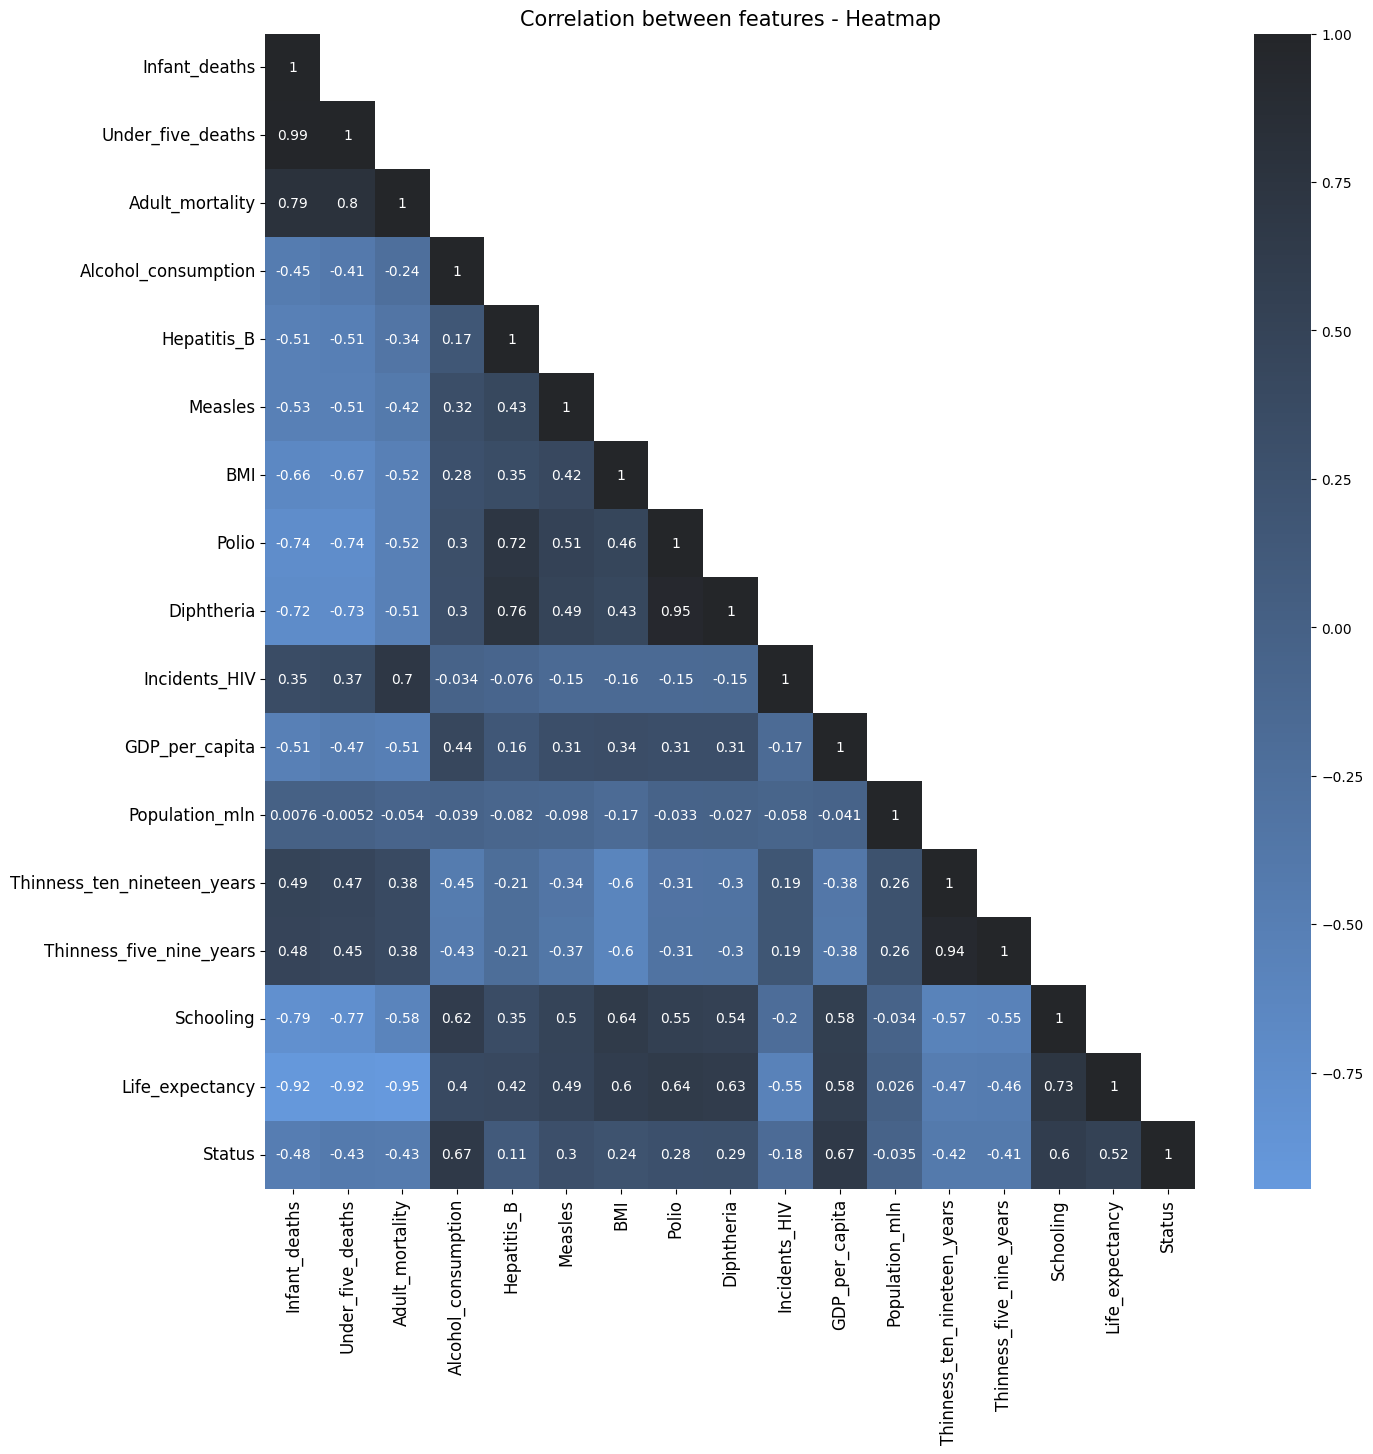

In [13]:
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(
    df_corr, 
    annot = True, 
    cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
    xticklabels = df_corr.columns.values,
    yticklabels = df_corr.columns.values,
    mask = mask);

plt.title('Correlation between features - Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

We can see high corelation between couple of features, therefore there is no need to keep all af them as their impact will be explained by another feature.

*   Infants death and under five deaths by adult mortality
*   Diphteria by polio
*   Thinnes 5-9 years by thinnes 10-19 years



In [14]:
df.drop(['Infant_deaths','Under_five_deaths','Diphtheria','Thinness_five_nine_years'], axis=1, inplace=True)

In [15]:
# Moving to descriptive status for visualization purposes
df['Status'] = np.where(df['Status'] == 1, 'Developed', 'Developing')

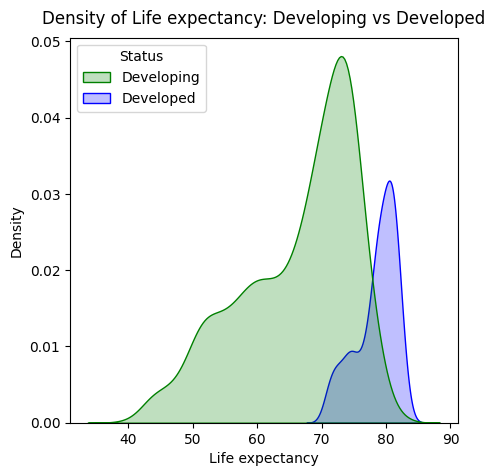

In [16]:
plt.rcParams['figure.figsize'] = (5, 5)

ax = sns.kdeplot(data=df, x="Life_expectancy", hue="Status", 
            palette = ['Green', 'Blue'], fill=True, legend=True)

sns.move_legend(ax, "upper left")
ax.set_title("Density of Life expectancy: Developing vs Developed", pad=10)
ax.set_xlabel("Life expectancy")     
plt.show();

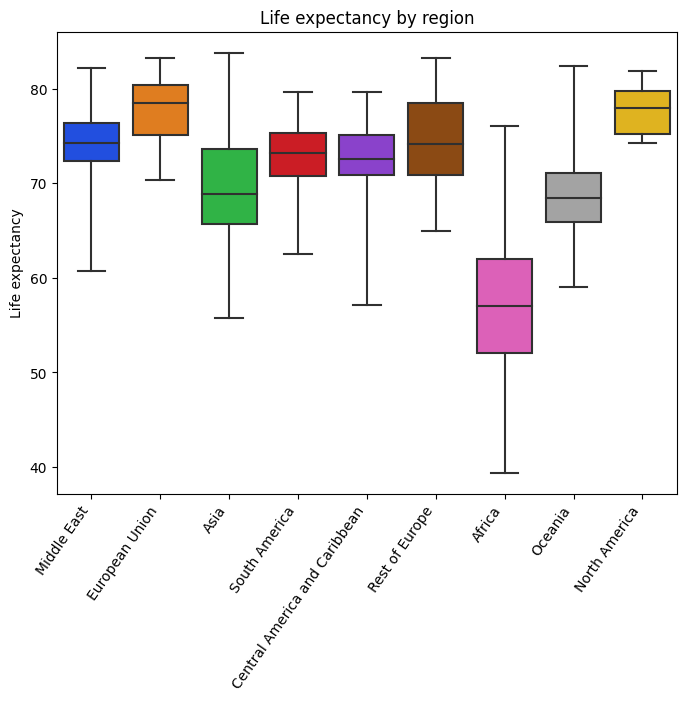

In [17]:
plt.rcParams['figure.figsize'] = (8, 6)
ax = sns.boxplot(data=df, x='Region', y='Life_expectancy', 
                 palette='bright', whis=[0, 100])

ax.xaxis.set_tick_params(rotation = 55)

labels = ax.get_xticklabels()
for label in labels:
    label.set_horizontalalignment('right')

ax.set_xlabel(None)
ax.set_ylabel("Life expectancy")
ax.set_title("Life expectancy by region")
plt.show();

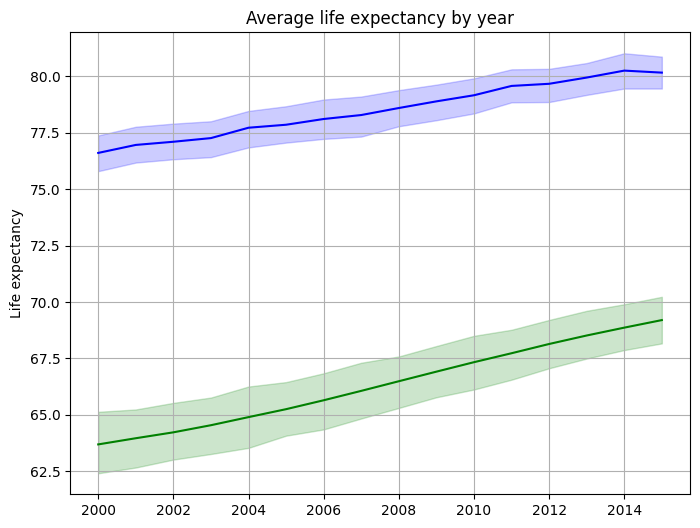

In [18]:
ax = sns.lineplot(
    data=df[df["Status"] == "Developing"], 
    x="Year", 
    y="Life_expectancy", 
    color='Green',
    errorbar=('ci', 90))

ax = sns.lineplot(
    data=df[df["Status"] == "Developed"], 
    x="Year", 
    y="Life_expectancy",
    color='Blue',
    errorbar=('ci', 90))

ax.set_xlabel(None)
ax.set_ylabel("Life expectancy")
ax.set_title("Average life expectancy by year")

plt.grid()
plt.show();

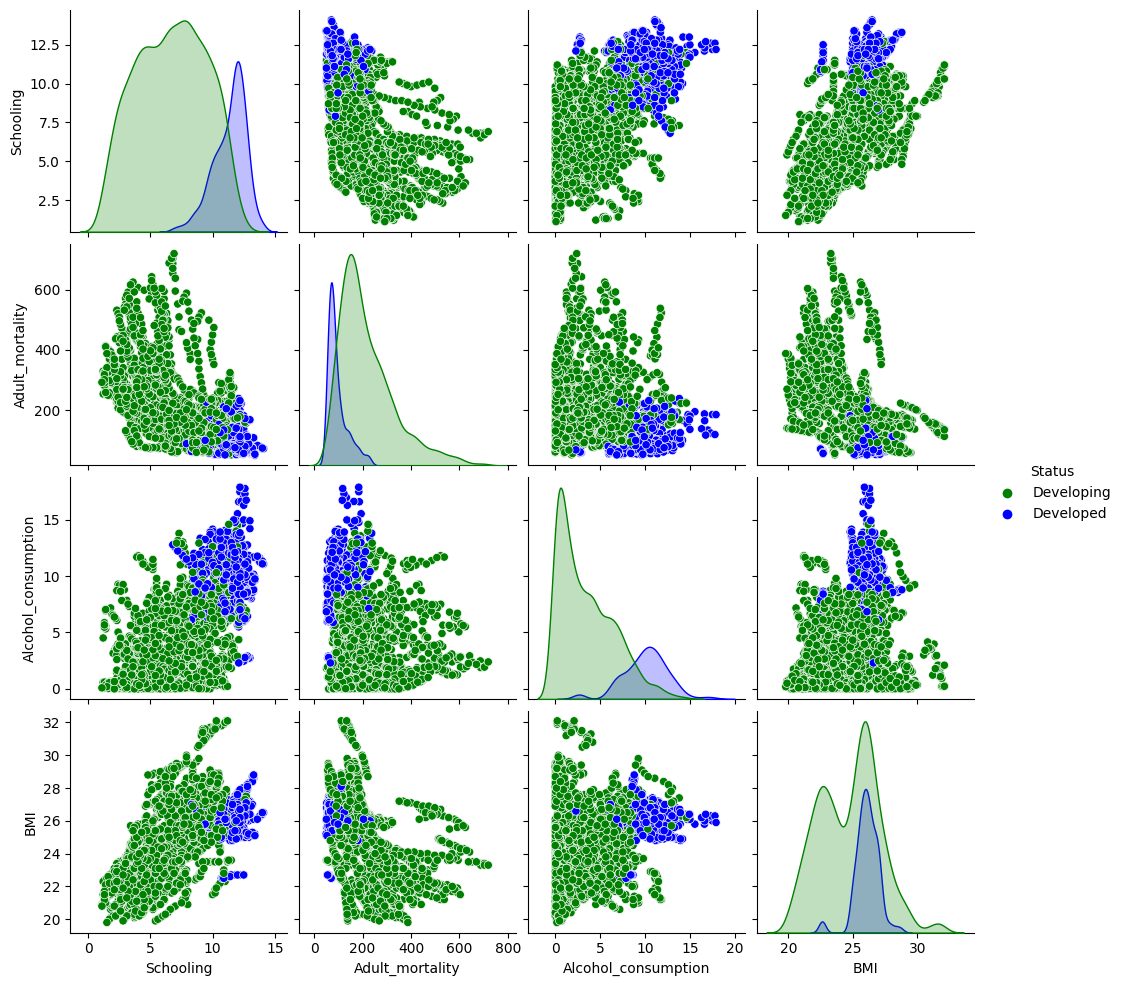

In [19]:
sns.pairplot(
    data = df[["Status", "Schooling", "Adult_mortality", "Alcohol_consumption", "BMI"]],
    hue = "Status" , palette = ['Green', 'Blue']);

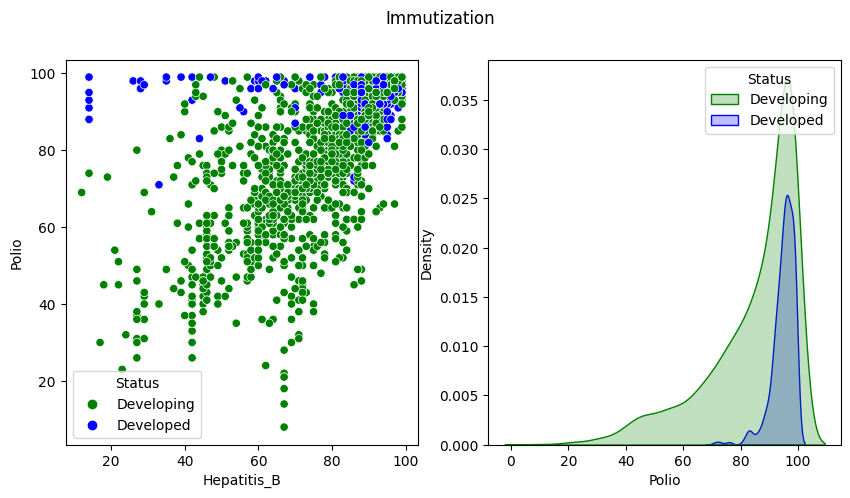

In [20]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

sns.scatterplot(ax=ax[0],
                data=df, 
                x="Hepatitis_B", 
                y="Polio",
                hue="Status",  
                palette=['Green','Blue'])

sns.kdeplot(ax=ax[1], data=df, x="Polio", hue="Status", 
            palette = ['Green', 'Blue'], fill=True, legend=True)

fig.suptitle('Immutization')
fig.tight_layout;

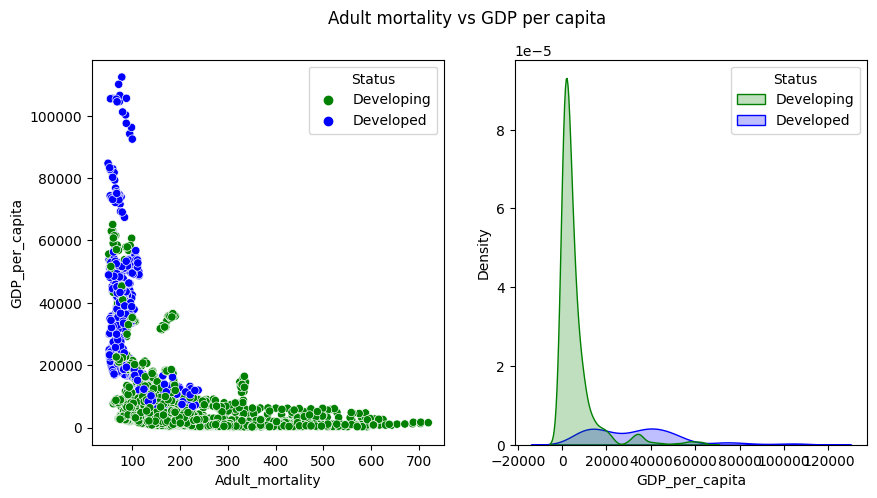

In [21]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

sns.scatterplot(ax=ax[0],
                data=df, 
                x="Adult_mortality", 
                y="GDP_per_capita",
                hue="Status",  
                palette=['Green','Blue'])

sns.kdeplot(ax=ax[1], data=df, x="GDP_per_capita", hue="Status", 
            palette = ['Green', 'Blue'], fill=True, legend=True)

fig.suptitle('Adult mortality vs GDP per capita')
fig.tight_layout;

In [22]:
# Features which seems to have biggest impact on adult mortality
to_plot = ["Adult_mortality", 'BMI', 'Polio', 'Schooling']

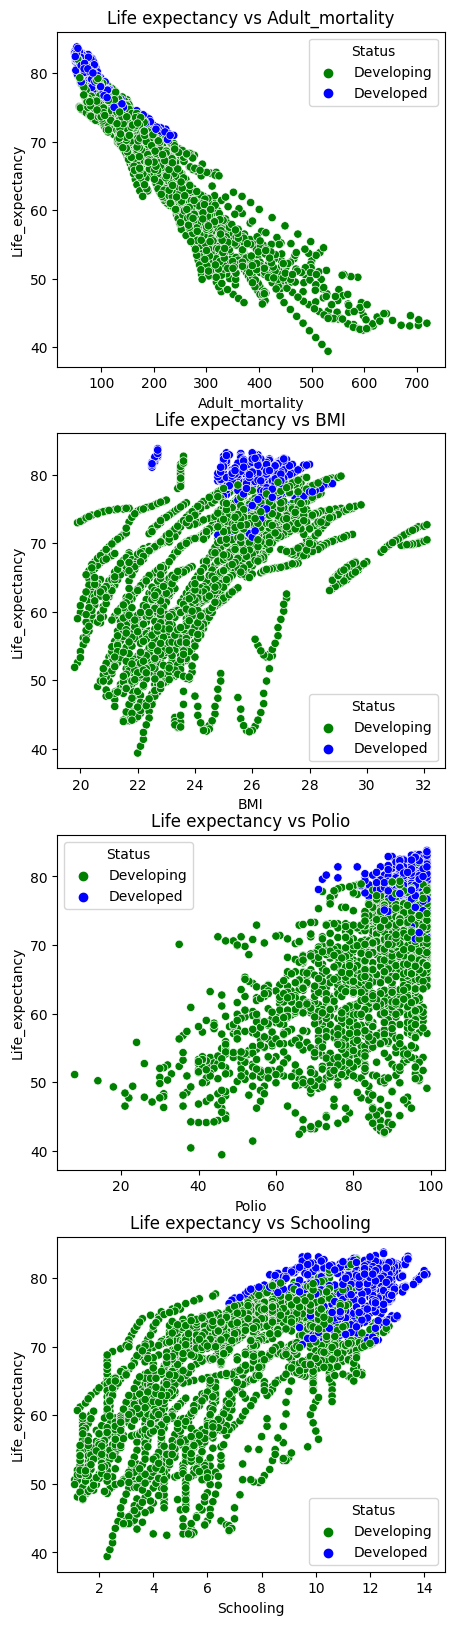

In [23]:
fig, ax = plt.subplots(figsize=(5,5*len(to_plot)), nrows=len(to_plot))

for i, feature in enumerate(to_plot):
  sns.scatterplot(ax=ax[i],
                  data=df, 
                  x=feature, 
                  y="Life_expectancy",
                  hue="Status",  
                  palette=['Green','Blue'])
  
  ax[i].set_title(f"Life expectancy vs {feature}")

fig.tight_layout;

From the preliminary analysis based on data exploration and visualization we can come across following conclusions:

*   Unsurprisingly, a key factor influencing life expectancy in a given country is adult mortality
* Another important factor is schooling which can be understood as a representation of the welfare level in the country
*   People in developed countries on average live longer than in developing countries, but in both cases distribution seems to be skewed left
*   Region with the lowest life expectancy and highest dispersion is Africa
*   Life expectancy increased throughout the years
*   On average we can observe higher alcohol consumption levels in developed countries than in developing
*   In general immunization coverage level is correlated across different types of diseases, but we don't see in this field big advantages of developed countries, especially in Hepatitis B
*   Biggest differentiation between developed and developing countries provides GDP per capita and adult mortality






# Models

In the next part of the project I will create and compare couple regression models trying to predict life expectany based on given factors. I will use:

*   Linear Regression
*   Decission Tree Regression

The third potential model would be polynomial regression, but due to lack of computational power I am not able to conduct one with reasonable outcome.

## Preprocessing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [25]:
# One-Hot encoding for region
ohe = pd.get_dummies(data=df, columns=["Region"])

In [26]:
# Going back to binary status
ohe['Status'] = np.where(ohe['Status'] == 'Developed', 1, 0)

In [27]:
# Dropping Region_Africa to avoid collinearity
df_model = ohe.drop(["Country", "Year", "Region_Africa"], axis=1)

In [28]:
# Dividing set to explanatory and explained variables
X = df_model.loc[:, df_model.columns != "Life_expectancy"]
y = df_model["Life_expectancy"]

In [29]:
# Spliting set to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sma
from statsmodels.compat import lzip
from statsmodels.stats.api import het_breuschpagan

In [31]:
# Building model of all features
X_const = sma.add_constant(X)
OLS_model = sma.OLS(y, X_const).fit()

print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     4078.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        05:36:49   Log-Likelihood:                -5626.9
No. Observations:                2864   AIC:                         1.130e+04
Df Residuals:                    2843   BIC:                         1.142e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [32]:
residuals = (OLS_model.resid)

In [33]:
# Checking heteroscedasticity 
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
test_result = het_breuschpagan(residuals, OLS_model.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 375.2665318334972),
 ('p-value', 2.711189912314363e-67),
 ('f-value', 21.434250867944993),
 ('f p-value', 1.5835863968711035e-72)]

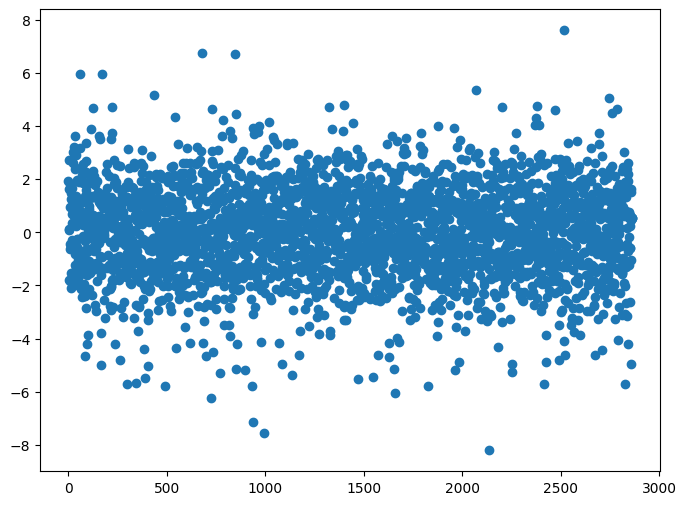

In [34]:
# Ploting residuals
plt.scatter(x=range(len(residuals)), y=OLS_model.resid)

Based on the Jarque-Bera test, Breusch-Pagan test and residual plot, I can assume that there are no significant issues with the data. After droping statistically insignificant features, I will build scikit learn regression model.

In [35]:
# Droping statistically insignificant features
X_train_lr = X_train.drop(['Measles', 'Population_mln', 'Thinness_ten_nineteen_years'], axis=1)

In [36]:
# Creating and fitting model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

## Decission Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model_dt = DecisionTreeRegressor(random_state=42)

In [40]:
# Looking for best hyperparameters for decision tree
searcher = GridSearchCV(model_dt, 
                        {'max_depth':range(1,20),
                         'min_samples_split':range(2,20)},
                        cv=10)

searcher.fit(X_train, y_train)
print("Best features: ", searcher.best_params_)
model_dt = searcher.best_estimator_

Best features:  {'max_depth': 18, 'min_samples_split': 2}


## Models comparison

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

In [43]:
mse_dt_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_dt)
mse_dt_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_dt)

r2_dt_train = r2_score(y_true=y_train, y_pred=y_train_pred_dt)
r2_dt_test = r2_score(y_true=y_test, y_pred=y_test_pred_dt)

In [44]:
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)

In [45]:
mse_lr_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_lr)
mse_lr_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_lr)

r2_lr_train = r2_score(y_true=y_train, y_pred=y_train_pred_lr)
r2_lr_test = r2_score(y_true=y_test, y_pred=y_test_pred_lr)

In [46]:
df_comp = pd.DataFrame.from_dict({"test":[mse_dt_test, mse_lr_test, r2_dt_test, r2_lr_test],
                      "train":[mse_dt_train, mse_lr_train, r2_dt_train, r2_lr_train]},\
                       orient='index', columns = ["Decission tree MSE", "Linear Regression MSE", "Decission tree R2", "Linear Regression R2"])

In [47]:
melted_strat = pd.melt(df_comp.reset_index(), id_vars='index', var_name='model_metrics')
melted_strat

,index,model_metrics,value
0,test,Decission tree MSE,0.921206
1,train,Decission tree MSE,0.000446
2,test,Linear Regression MSE,3.271100
3,train,Linear Regression MSE,2.911162
4,test,Decission tree R2,0.988900
5,train,Decission tree R2,0.999995
6,test,Linear Regression R2,0.960585
7,train,Linear Regression R2,0.967574


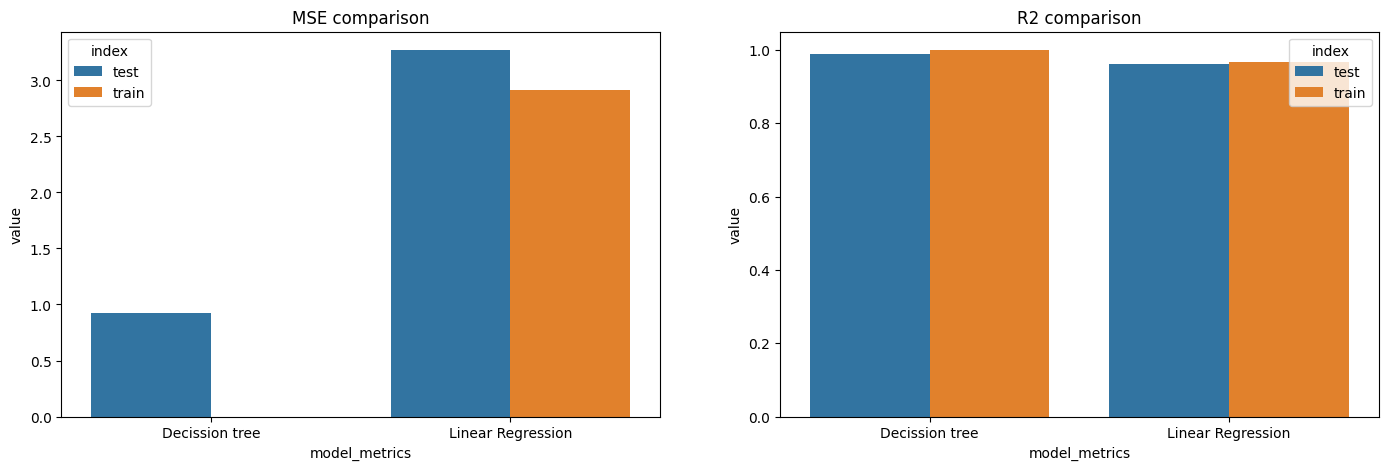

In [48]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(17,5))

sns.barplot(ax=ax[0], x='model_metrics', y='value', hue='index', data=melted_strat[:4])\
.set(title='MSE comparison')

sns.barplot(ax=ax[1], x='model_metrics', y='value', hue='index', data=melted_strat[4:])\
.set(title='R2 comparison')

ax[0].set_xticklabels(["Decission tree", "Linear Regression"]);

Above are presented results of comparison two models: Decission Tree and Linear Regression.

In general, Decission Tree provides better results, although has bigger problem with overfitting. 
Overfitting of DT still seems to be resonable, therefore it would be a chosen model for predictions.
